In [111]:
# Basic Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

# To fetch all columns
pd.set_option('display.max_columns' , None)

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Reading dataExplortory data

In [112]:
# Importing dataExploratory data file

df = pd.read_excel("dataExploratory.xlsx",index_col = 0)
df.columns

Index(['Age', 'Distance From Home', 'Employee Hourly Rate',
       'Number of Companies Worked', 'Employee Last Salary Hike Percent',
       'Total Work Experience In Years', 'Training Times Last Year',
       'Experience Years At This Company', 'Experience Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Employee Education Level', 'Employee Environment Satisfaction',
       'Employee Job Involvement', 'Employee Job Level',
       'Employee Job Satisfaction', 'Employee Relationship Satisfaction',
       'Employee Work Life Balance', 'Gender', 'Educational Background',
       'Marital Status', 'Employee Department', 'Employee Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition',
       'Performance Rating'],
      dtype='object')

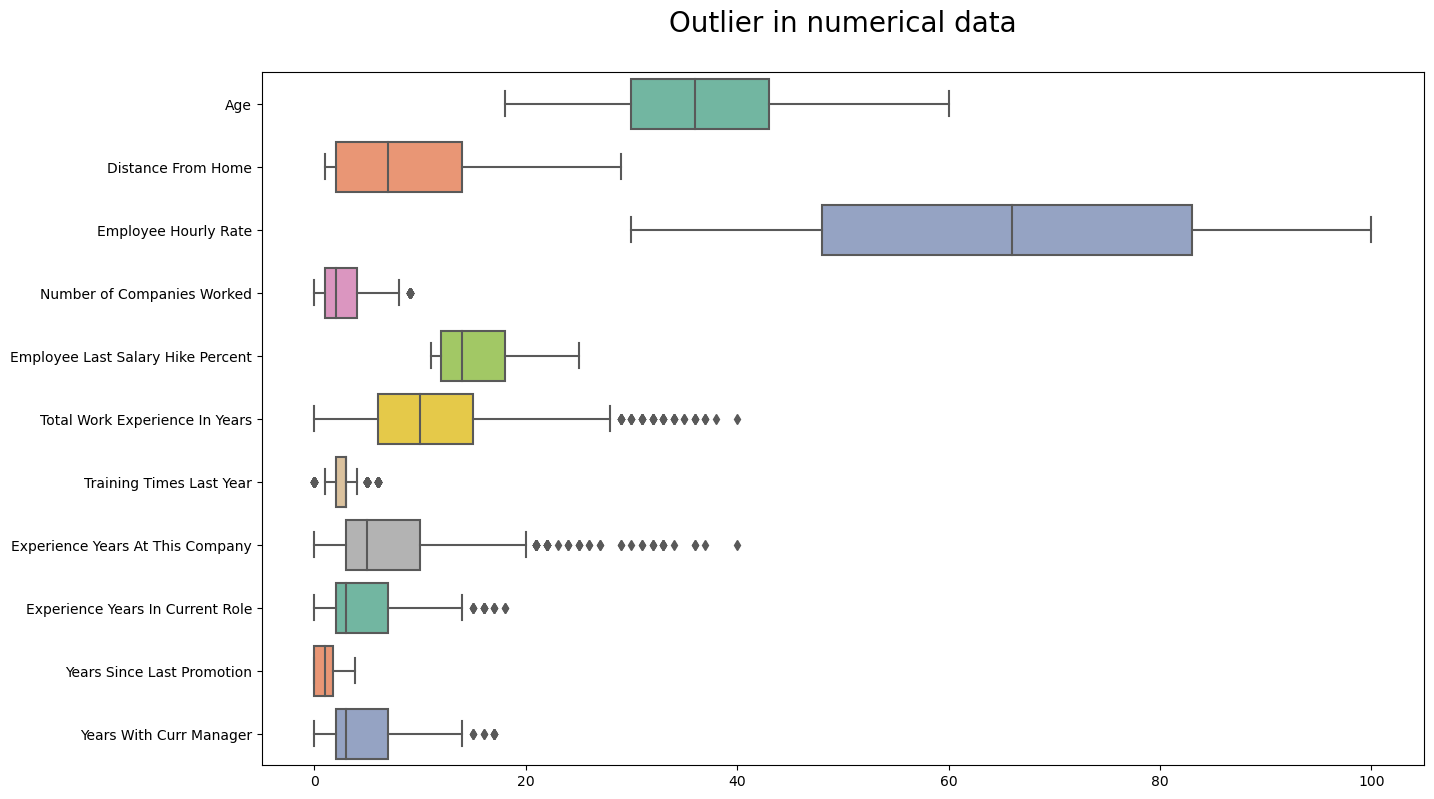

In [113]:
# Defining numerical features

num_data = df[['Age','Distance From Home','Employee Hourly Rate','Number of Companies Worked','Employee Last Salary Hike Percent', 'Total Work Experience In Years',
              'Training Times Last Year','Experience Years At This Company','Experience Years In Current Role','Years Since Last Promotion',
              'Years With Curr Manager']]

# Outlier checking on numeric features
plt.figure(figsize=(15,9))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

### These columns are having outliers:

* Number of Companies Worked
* Total Work Experience In Years
* Training Times Last Year
* Experience Years At This Company
* Experience Years In CurrentRole
* Years With Curr Manager

## Handling Outliers

#### Number of Companies Worked

In [114]:
print(f"\033[1m 10% quantile of Number of Companies Worked : {num_data['Number of Companies Worked'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Number of Companies Worked : {num_data['Number of Companies Worked'].quantile(0.90)}")

 10% quantile of Number of Companies Worked : 0.0
 90% quantile of Number of Companies Worked : 7.0


In [115]:
num_data["Number of Companies Worked"] = np.where(num_data["Number of Companies Worked"] >7.0, 7.0,num_data['Number of Companies Worked'])
t=skew(num_data["Number of Companies Worked"])
print("\033[1m Skewness of Number of Companies Worked : {}".format(t))

 Skewness of Number of Companies Worked : 0.8140421709832787


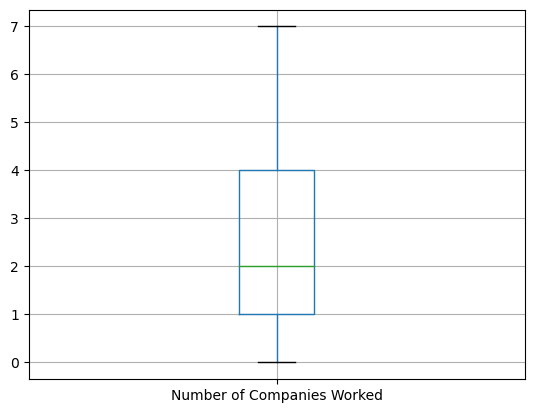

In [116]:
plt.show(num_data.boxplot("Number of Companies Worked"))

### Total Work Experience In Years

In [117]:
print(f"\033[1m 10% quantile of Total Work Experience In Years : {num_data['Total Work Experience In Years'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Total Work Experience In Years : {num_data['Total Work Experience In Years'].quantile(0.90)}")

 10% quantile of Total Work Experience In Years : 3.0
 90% quantile of Total Work Experience In Years : 23.0


In [118]:
num_data["Total Work Experience In Years"] = np.where(num_data["Total Work Experience In Years"] >23.0, 23.0,num_data['Total Work Experience In Years'])
t=skew(num_data["Total Work Experience In Years"])
print("\033[1m Skewness of Total Work Experience In Yearsd : {}".format(t))

 Skewness of Total Work Experience In Yearsd : 0.5337701681831295


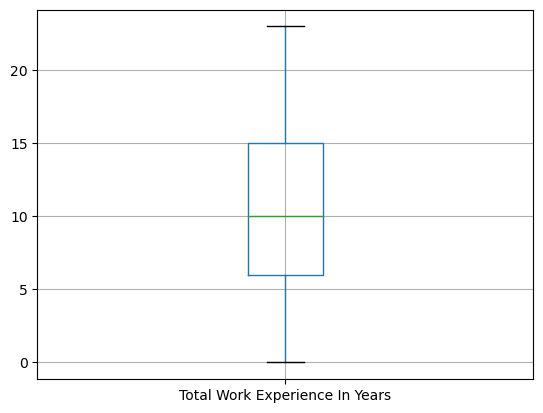

In [119]:
plt.show(num_data.boxplot("Total Work Experience In Years"))

### Training Times Last Year

In [120]:
print(f"\033[1m 10% quantile of Training Times Last Year : {num_data['Training Times Last Year'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Training Times Last Year : {num_data['Training Times Last Year'].quantile(0.90)}")

 10% quantile of Training Times Last Year : 2.0
 90% quantile of Training Times Last Year : 5.0


In [121]:
num_data["Training Times Last Year"] = np.where(num_data["Training Times Last Year"] <1.0, 1.0,num_data['Training Times Last Year'])
num_data["Training Times Last Year"] = np.where(num_data["Training Times Last Year"] >4.0, 4.0,num_data['Training Times Last Year'])
t=skew(num_data["Training Times Last Year"])
print("\033[1m Skewness of Training Times Last Year : {}".format(t))

 Skewness of Training Times Last Year : 0.0014732709380578283


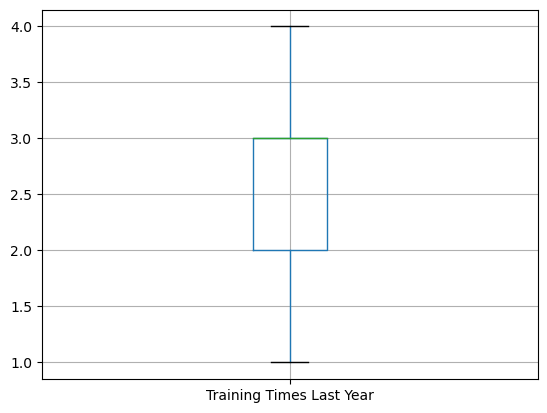

In [122]:
plt.show(num_data.boxplot("Training Times Last Year"))

### Experience Years At This Company

In [123]:
print(f"\033[1m 10% quantile of Experience Years At This Company : {num_data['Experience Years At This Company'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Experience Years At This Company : {num_data['Experience Years At This Company'].quantile(0.90)}")

 10% quantile of Experience Years At This Company : 1.0
 90% quantile of Experience Years At This Company : 15.0


In [124]:
num_data["Experience Years At This Company"] = np.where(num_data["Experience Years At This Company"] >15.0, 15.0,num_data['Experience Years At This Company'])
t=skew(num_data["Experience Years At This Company"])
print("\033[1m Skewness of Experience Years At This Company : {}".format(t))

 Skewness of Experience Years At This Company : 0.573319644340013


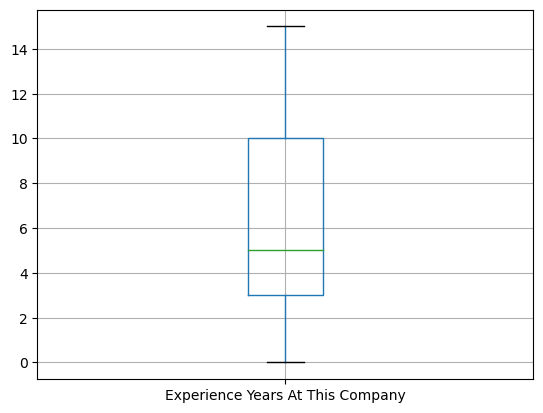

In [125]:
plt.show(num_data.boxplot("Experience Years At This Company"))

### Experience Years In Current Role

In [126]:
print(f"\033[1m 10% quantile of Experience Years In Current Role : {num_data['Experience Years In Current Role'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Experience Years In Current Role : {num_data['Experience Years In Current Role'].quantile(0.90)}")

 10% quantile of Experience Years In Current Role : 0.0
 90% quantile of Experience Years In Current Role : 9.0


In [127]:
num_data["Years With Curr Manager"] = np.where(num_data["Years With Curr Manager"] >9.0, 9.0,num_data['Years With Curr Manager'])
t=skew(num_data["Years With Curr Manager"])
print("\033[1m Skewness of Years With Curr Manager : {}".format(t))

 Skewness of Years With Curr Manager : 0.3378734233306521


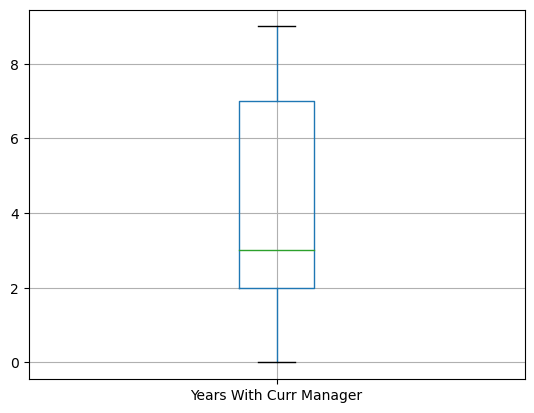

In [128]:
plt.show(num_data.boxplot("Years With Curr Manager"))

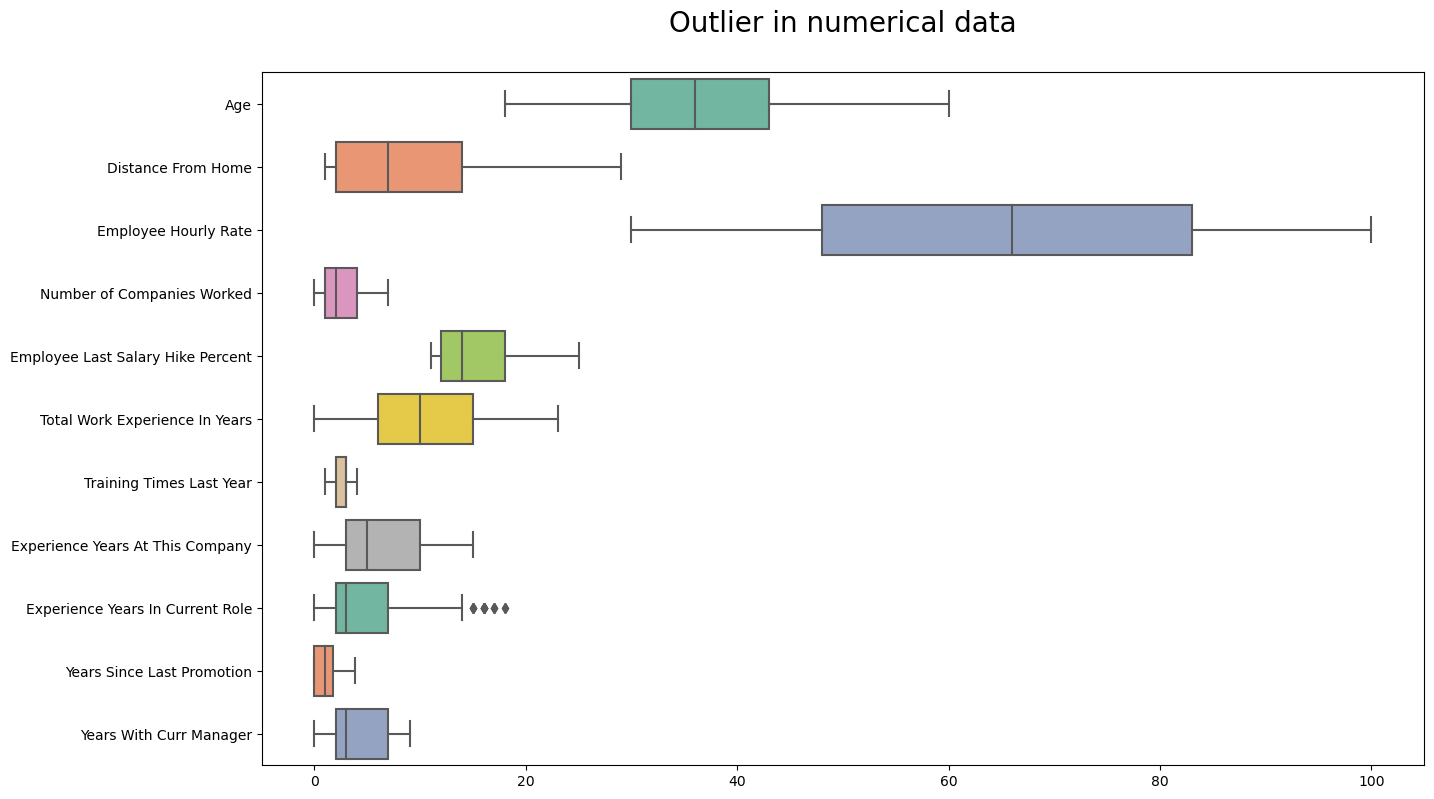

In [129]:
plt.figure(figsize=(15,9))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

##  Label Encoding
* ML algorithm dont process with object type data so we have to convert object type data into numerical type data

In [130]:
# Converting Labeled data to Numerical data using label Encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df[['Gender', 'Educational Background', 'Marital Status','Employee Department', 'Employee Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition']] = df[['Gender', 'Educational Background', 
       'Marital Status','Employee Department', 'Employee Job Role','Business Travel Frequency', 'Over Time', 
       'Attrition']].apply(label.fit_transform)

## After Label Encoding

In [131]:
# After label Encoding dataframe
df

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Employee Education Level,Employee Environment Satisfaction,Employee Job Involvement,Employee Job Level,Employee Job Satisfaction,Employee Relationship Satisfaction,Employee Work Life Balance,Gender,Educational Background,Marital Status,Employee Department,Employee Job Role,Business Travel Frequency,Over Time,Attrition,Performance Rating
EmpNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0.000000,8,3,4,3,2,4,4,2,1,2,2,5,13,2,0,0,3
E1001006,47,14,42,2,12,20,2,7,7,1.000000,7,4,4,3,2,1,4,3,1,2,2,5,13,2,0,0,3
E1001007,40,5,48,5,21,20,2,18,13,1.000000,12,4,4,2,3,1,3,3,1,1,1,5,13,1,1,0,4
E1001009,41,10,73,3,15,23,2,21,6,3.464102,6,4,2,2,5,4,2,2,1,0,0,3,8,2,0,0,3
E1001010,60,16,84,8,14,10,1,2,2,1.414214,2,4,1,3,2,1,4,3,1,2,2,5,13,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0.000000,4,1,4,4,2,4,2,3,0,3,0,5,13,1,1,0,4
E100993,37,10,80,3,17,4,2,1,0,0.000000,0,2,4,4,1,4,1,3,1,1,2,1,15,2,0,0,3
E100994,50,28,74,1,11,20,3,20,8,1.732051,8,1,4,4,1,3,3,3,1,3,1,1,15,2,1,0,3


In [132]:
# defing Independent variables as X
X = df.iloc[:,:-1]
# Defing Target variable or dependent variable
y = df.iloc[:,-1]

In [133]:
X

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Employee Education Level,Employee Environment Satisfaction,Employee Job Involvement,Employee Job Level,Employee Job Satisfaction,Employee Relationship Satisfaction,Employee Work Life Balance,Gender,Educational Background,Marital Status,Employee Department,Employee Job Role,Business Travel Frequency,Over Time,Attrition
EmpNumber,,,,,,,,,,,,,,,,,,,,,,,,,,
E1001000,32,10,55,1,12,10,2,10,7,0.000000,8,3,4,3,2,4,4,2,1,2,2,5,13,2,0,0
E1001006,47,14,42,2,12,20,2,7,7,1.000000,7,4,4,3,2,1,4,3,1,2,2,5,13,2,0,0
E1001007,40,5,48,5,21,20,2,18,13,1.000000,12,4,4,2,3,1,3,3,1,1,1,5,13,1,1,0
E1001009,41,10,73,3,15,23,2,21,6,3.464102,6,4,2,2,5,4,2,2,1,0,0,3,8,2,0,0
E1001010,60,16,84,8,14,10,1,2,2,1.414214,2,4,1,3,2,1,4,3,1,2,2,5,13,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E100992,27,3,71,1,20,6,3,6,5,0.000000,4,1,4,4,2,4,2,3,0,3,0,5,13,1,1,0
E100993,37,10,80,3,17,4,2,1,0,0.000000,0,2,4,4,1,4,1,3,1,1,2,1,15,2,0,0
E100994,50,28,74,1,11,20,3,20,8,1.732051,8,1,4,4,1,3,3,3,1,3,1,1,15,2,1,0


In [134]:
y

EmpNumber
E1001000    3
E1001006    3
E1001007    4
E1001009    3
E1001010    3
           ..
E100992     4
E100993     3
E100994     3
E100995     3
E100998     2
Name: Performance Rating, Length: 1200, dtype: int64

## Handling Imbalanced data
#### Converting Imbalance data into balanced data
* Balancing data with SMOTE Technique gives more number of NaN values
* so, we use RandomOverSampler Technique to balance the data

In [135]:
pip install imblearn

In [136]:
# Imports
from imblearn.over_sampling import RandomOverSampler,SMOTENC,SMOTE
# Intilizing the model
oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_resample(X,y)
X_smote = pd.DataFrame(X_smote)
X_smote.columns = ['Age', 'Distance From Home', 'Employee Hourly Rate',
       'Number of Companies Worked', 'Employee Last Salary Hike Percent',
       'Total Work Experience In Years', 'Training Times Last Year',
       'Experience Years At This Company', 'Experience Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Employee Education Level', 'Employee Environment Satisfaction',
       'Employee Job Involvement', 'Employee Job Level',
       'Employee Job Satisfaction', 'Employee Relationship Satisfaction',
       'Employee Work Life Balance', 'Gender', 'Education Background',
       'Marital Status', 'Employees Department', 'Employees Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition']
X_smote

,Age,Distance From Home,Employee Hourly Rate,Number of Companies Worked,Employee Last Salary Hike Percent,Total Work Experience In Years,Training Times Last Year,Experience Years At This Company,Experience Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Employee Education Level,Employee Environment Satisfaction,Employee Job Involvement,Employee Job Level,Employee Job Satisfaction,Employee Relationship Satisfaction,Employee Work Life Balance,Gender,Education Background,Marital Status,Employees Department,Employees Job Role,Business Travel Frequency,Over Time,Attrition
0,32,10,55,1,12,10,2,10,7,0.000000,8,3,4,3,2,4,4,2,1,2,2,5,13,2,0,0
1,47,14,42,2,12,20,2,7,7,1.000000,7,4,4,3,2,1,4,3,1,2,2,5,13,2,0,0
2,40,5,48,5,21,20,2,18,13,1.000000,12,4,4,2,3,1,3,3,1,1,1,5,13,1,1,0
3,41,10,73,3,15,23,2,21,6,3.464102,6,4,2,2,5,4,2,2,1,0,0,3,8,2,0,0
4,60,16,84,8,14,10,1,2,2,1.414214,2,4,1,3,2,1,4,3,1,2,2,5,13,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,55,2,40,7,15,31,3,9,7,2.449490,2,1,3,2,4,1,2,4,1,3,2,4,8,0,0,0
2618,52,11,82,8,20,9,3,5,2,1.000000,4,4,4,3,2,3,2,3,0,1,1,1,15,2,0,0
2619,45,25,83,3,22,22,4,0,0,0.000000,0,3,2,3,5,2,3,3,0,3,2,4,8,1,0,0
2620,28,10,74,1,22,1,5,1,0,0.000000,0,1,4,3,1,2,2,3,1,3,1,5,14,2,0,0


In [137]:
# Rechecking dataset
y_smote.value_counts(normalize=True)*100

3    33.333333
4    33.333333
2    33.333333
Name: Performance Rating, dtype: float64

### After sampling , dataset is balanced.

In [138]:
# Again checking for Normal distribution in balanced data
from scipy.stats import skew
def skewness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

skewness(X_smote)

[]

## Feature Selection

In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(X_smote,y_smote)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_smote.columns)

featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

featurescores.nlargest(5,'Scores')

,feature_names,Scores
4,Employee Last Salary Hike Percent,1249.897574
12,Employee Environment Satisfaction,459.848914
7,Experience Years At This Company,405.646634
8,Experience Years In Current Role,372.132799
9,Years Since Last Promotion,339.492707


In [140]:
#checking the columns
X_smote.columns

Index(['Age', 'Distance From Home', 'Employee Hourly Rate',
       'Number of Companies Worked', 'Employee Last Salary Hike Percent',
       'Total Work Experience In Years', 'Training Times Last Year',
       'Experience Years At This Company', 'Experience Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Employee Education Level', 'Employee Environment Satisfaction',
       'Employee Job Involvement', 'Employee Job Level',
       'Employee Job Satisfaction', 'Employee Relationship Satisfaction',
       'Employee Work Life Balance', 'Gender', 'Education Background',
       'Marital Status', 'Employees Department', 'Employees Job Role',
       'Business Travel Frequency', 'Over Time', 'Attrition'],
      dtype='object')

In [141]:
# splitting the data

X = X_smote.loc[:,['Employee Last Salary Hike Percent','Experience Years At This Company','Employee Environment Satisfaction','Experience Years In Current Role','Years Since Last Promotion']] 
y = y_smote

## Training Data

In [142]:
# spliting Train data and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((2097, 5), (525, 5), (2097,), (525,))

## Feature Scaling

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict))

Accuracy score : 95.62 %

Classification Report

              precision    recall  f1-score   support

           2       0.92      1.00      0.96       184
           3       1.00      0.87      0.93       173
           4       0.95      1.00      0.98       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



## Hyper Parameter Tuning

In [148]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,2,3,4,5,10,15,20,30],
           'random_state':[0,2,3,4,10],
           'n_estimators':[5,10,30,50,70,100,150],
            'criterion':['gini','entropy']  
           } 

grid = GridSearchCV(model,parameters, cv=10,verbose=1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 630 candidates, totalling 6300 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 30],
                         'n_estimators': [5, 10, 30, 50, 70, 100, 150],
                         'random_state': [0, 2, 3, 4, 10]},
             verbose=1)

In [149]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'random_state': 0}

In [152]:
from sklearn.ensemble import RandomForestClassifier

rf_lr = RandomForestClassifier(criterion= 'entropy',max_depth= 20, n_estimators=100, random_state= 0)
rf_lr.fit(X_train,y_train)
y_predict_lr = rf_lr.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"\033[1mAccuracy score : {round(accuracy_score(y_test,y_predict)*100,2)} %\n")
print("Classification Report\n")
print(classification_report(y_test,y_predict_lr))

Accuracy score : 95.62 %

Classification Report

              precision    recall  f1-score   support

           2       0.92      1.00      0.96       184
           3       1.00      0.87      0.93       173
           4       0.95      1.00      0.98       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525

